In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [111]:
data = pd.read_csv('S:/Projects/HeartAttack/Heart-Attack-Prediction/data/heart.csv')

In [112]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
print('Then number of rows are {}'.format(data.shape[0]) ,'and the number of columns are {}'.format(data.shape[1]))

Then number of rows are 303 and the number of columns are 14


In [116]:
#finding out the NaN values in each column
null_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
print('There are {} null features'.format(null_features))

There are [] null features


**As you can see there are no NaN features in this dataset.**

In [117]:
#checking for duplicate rows
data.duplicated().sum()

1

In [118]:
data.drop_duplicates(inplace=True)

In [119]:
s_0 = data.sex.value_counts()[0]  #sex 0 count
s_1 = data.sex.value_counts()[1]  #sex 1 count   
print('Sex 0 : ',s_0, 'Sex 1 : ',s_1)

Sex 0 :  96 Sex 1 :  206


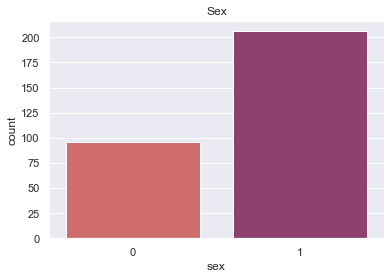

In [120]:
#plotting Sex 0 and Sex 1
sns.countplot(data=data, x="sex", palette="flare")
plt.title("Sex")
plt.show()

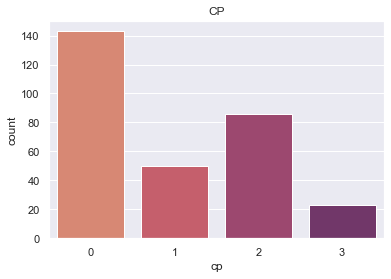

In [121]:
#plotting chest pain type
sns.countplot(data=data, x='cp', palette='flare')
plt.title("CP")
plt.show()

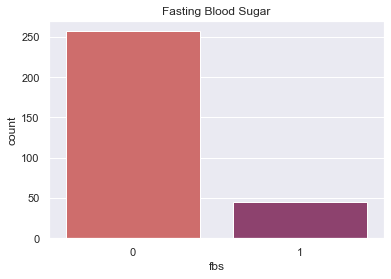

In [122]:
sns.countplot(data=data, x='fbs', palette='flare')
plt.title("Fasting Blood Sugar")
plt.show()

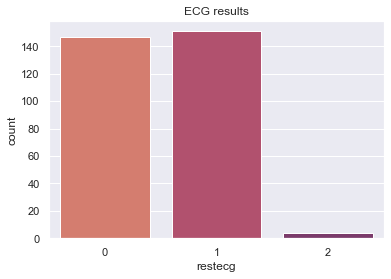

In [123]:
sns.countplot(data=data, x='restecg', palette='flare')
plt.title("ECG results")
plt.show()

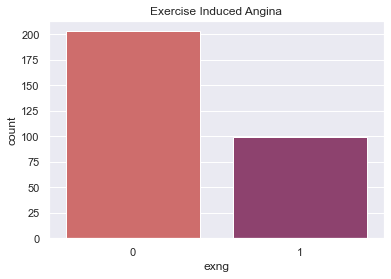

In [124]:
sns.countplot(data=data, x='exng', palette='flare')
plt.title("Exercise Induced Angina")
plt.show()

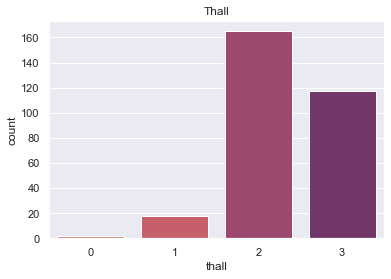

In [125]:
sns.countplot(data=data, x='thall', palette='flare')
plt.title("Thall")
plt.show()

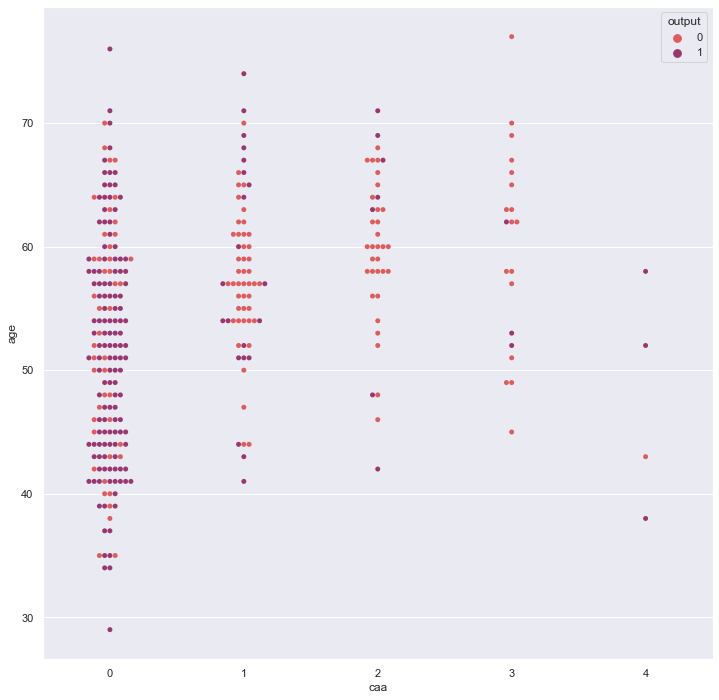

In [126]:
plt.figure(figsize = (12,12))
sns.swarmplot(x=data['caa'],y=data['age'],hue=data['output'], palette='flare')
plt.show()

Category 0 - Most prone to Heart Attack
<br>
Category 1,2,3 - similar at risk
<br>
Category 4 - Very less people but majority are prone to heart attack

**OUTLIERS**

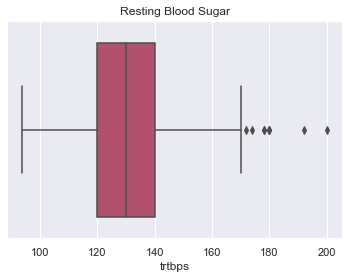

In [127]:
sns.boxplot(data=data, x='trtbps', palette='flare')
plt.title("Resting Blood Sugar")
plt.show()

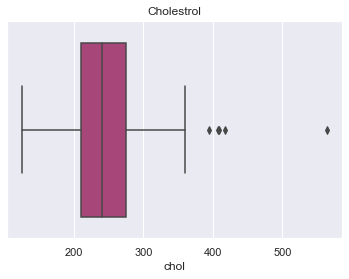

In [128]:
sns.boxplot(data=data, x='chol', palette='magma')
plt.title("Cholestrol")
plt.show()

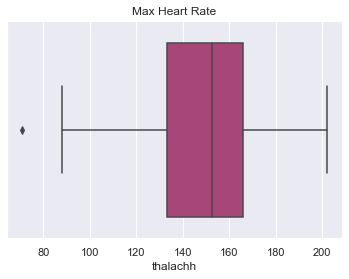

In [129]:
sns.boxplot(data=data, x='thalachh', palette='magma')
plt.title("Max Heart Rate")
plt.show()

**DENSITY DISTRIBUTION**

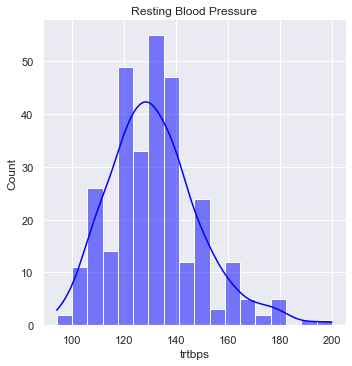

In [130]:
sns.displot(data=data, x='trtbps',kde=True,color='blue')
plt.title("Resting Blood Pressure")
plt.show()

As you can infer from this graph, maximum people have normal blood pressure while a few have abnormal blood pressures(too low or too high).

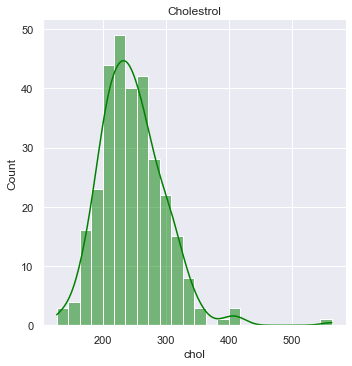

In [131]:
sns.displot(data=data, x='chol',kde=True,color='green')
plt.title("Cholestrol")
plt.show()

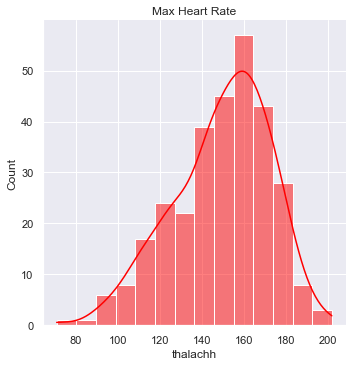

In [132]:
sns.displot(data=data, x='thalachh',kde=True,color='red')
plt.title("Max Heart Rate")
plt.show()

S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


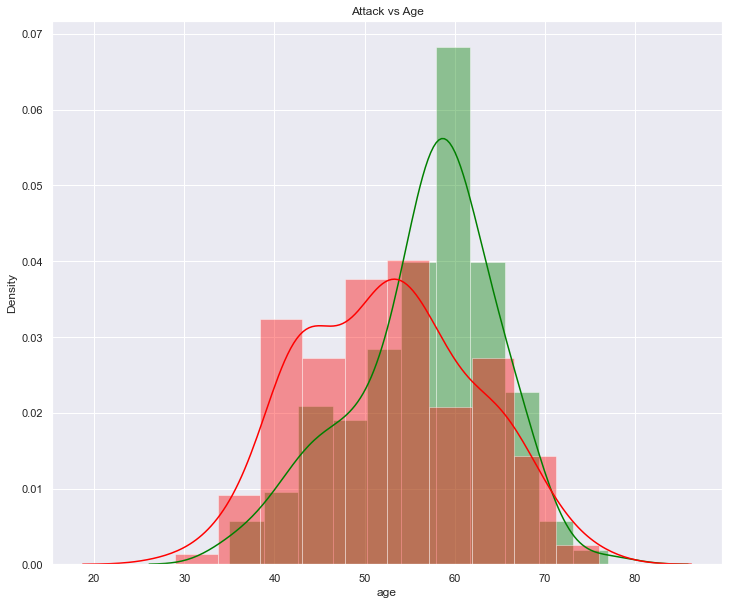

In [133]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['age'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['age'], color='red',kde=True)
plt.title('Attack vs Age')
plt.show()

S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


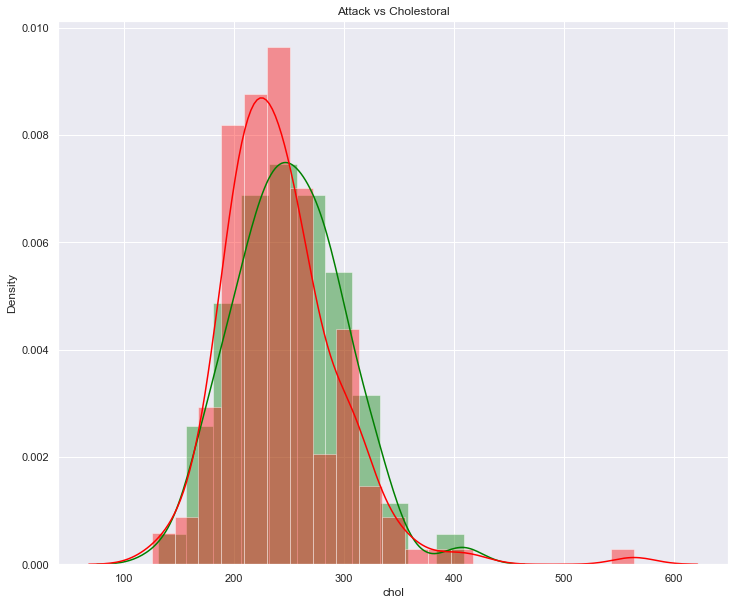

In [134]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['chol'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['chol'], color='red',kde=True)
plt.title('Attack vs Cholestoral')
plt.show()

S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


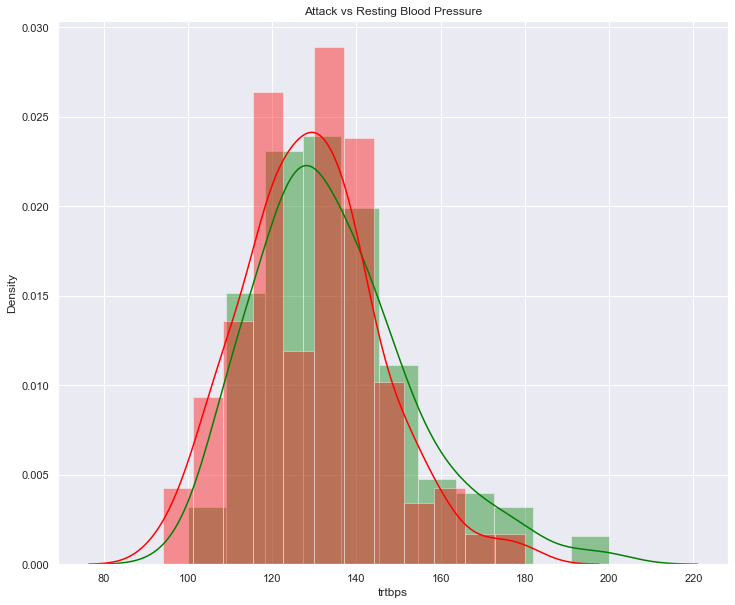

In [135]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['output'] == 0]['trtbps'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['trtbps'], color='red',kde=True)
plt.title('Attack vs Resting Blood Pressure')
plt.show()

S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


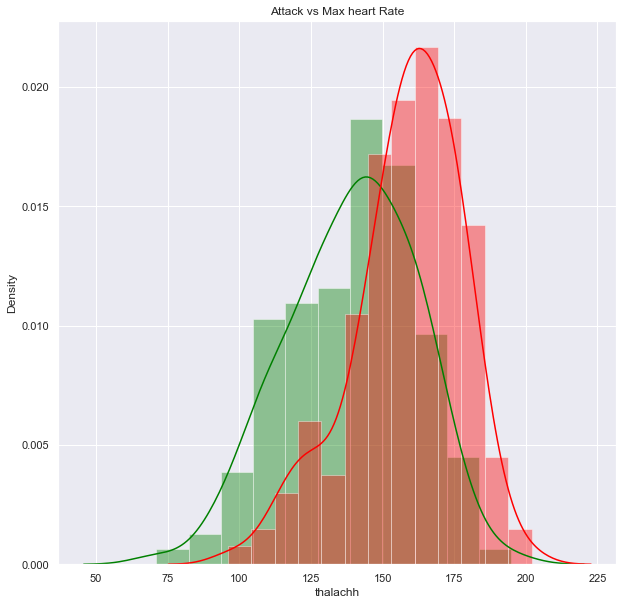

In [136]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['output'] == 0]['thalachh'], color='green',kde=True,) 
sns.distplot(data[data['output'] == 1]['thalachh'], color='red',kde=True)
plt.title('Attack vs Max heart Rate')
plt.show()

<Figure size 1440x1440 with 0 Axes>

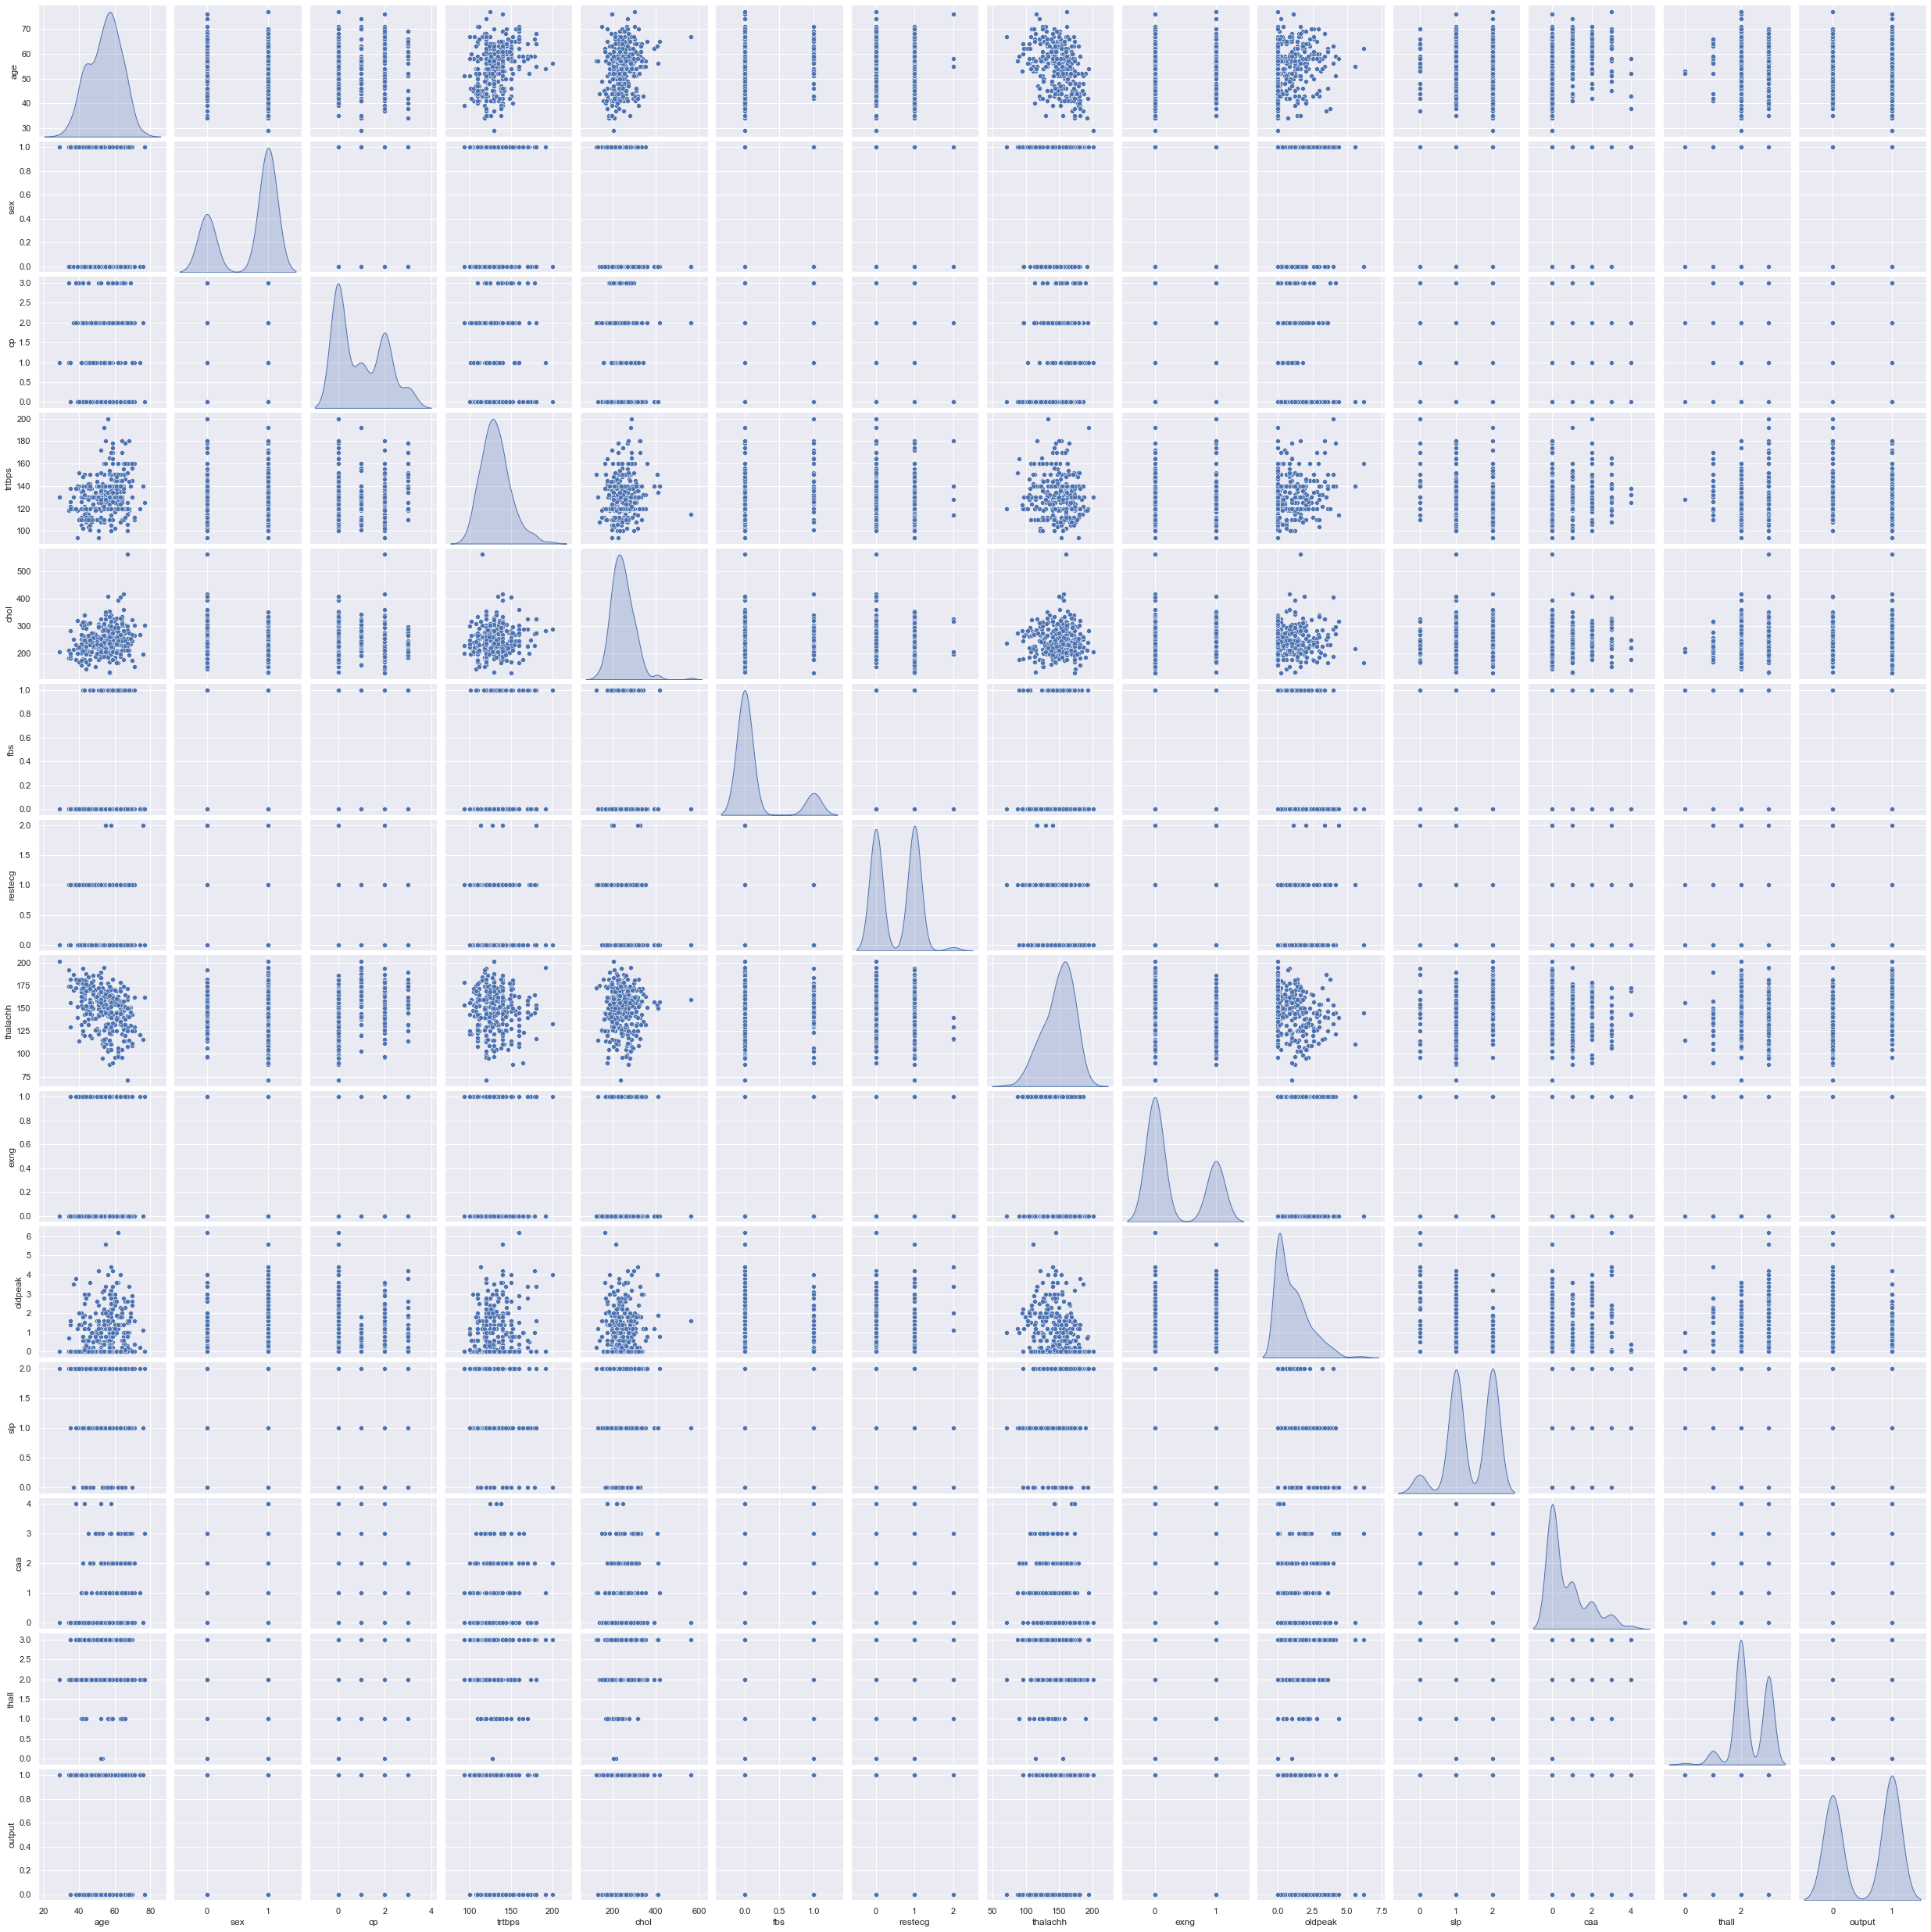

In [137]:
plt.figure(figsize=(20,20))
sns.set(style = "darkgrid")
sns.pairplot(data, palette="icefire", diag_kind="kde")
plt.show()

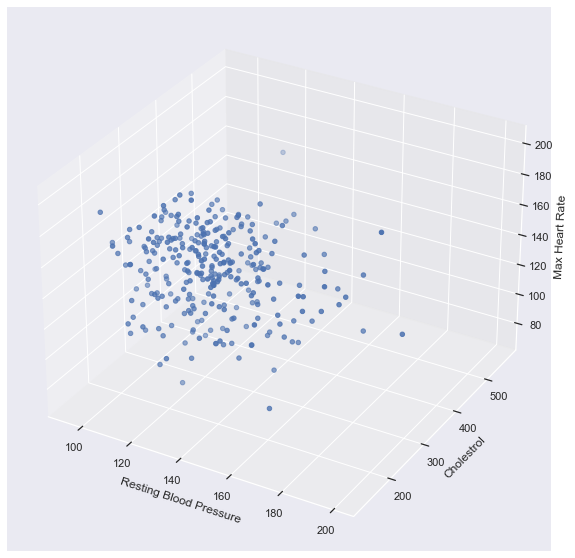

In [142]:
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')
x = data['trtbps']
y = data['chol']
z = data['thalachh']

ax.set_xlabel("Resting Blood Pressure")
ax.set_ylabel("Cholestrol")
ax.set_zlabel("Max Heart Rate ")

ax.scatter(x,y,z)
plt.show()